# Convolutional Neural Networks: Application

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

## Happy House Data

In [22]:
# Load Dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

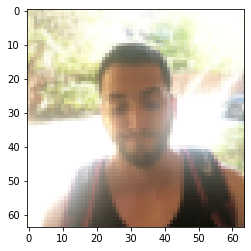

In [23]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

### CNN model
 - TF sequential Model

In [24]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            tf.keras.layers.ZeroPadding2D(3, input_shape=(64,64,3)),
            tf.keras.layers.Conv2D(32,(7,7), strides=(1,1)),
            tf.keras.layers.BatchNormalization(axis=3),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    
    return model

In [25]:
happy_model = happyModel()
happy_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [26]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [27]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 31ms/step - loss: 0.7798 - accuracy: 0.7467
Epoch 2/10
38/38 [==============================] - 1s 32ms/step - loss: 0.1696 - accuracy: 0.9333
Epoch 3/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1984 - accuracy: 0.9233
Epoch 4/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1708 - accuracy: 0.9250
Epoch 5/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1047 - accuracy: 0.9533
Epoch 6/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1079 - accuracy: 0.9633
Epoch 7/10
38/38 [==============================] - 1s 32ms/step - loss: 0.1913 - accuracy: 0.9283
Epoch 8/10
38/38 [==============================] - 1s 32ms/step - loss: 0.1454 - accuracy: 0.9483
Epoch 9/10
38/38 [==============================] - 1s 32ms/step - loss: 0.0787 - accuracy: 0.9783
Epoch 10/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1196 - accuracy: 0.9667


In [28]:
score = happy_model.evaluate(X_test, Y_test)

print(f"accuracy : {score[1]}, loss : {score[0]}")

5/5 [==============================] - 0s 15ms/step - loss: 0.2626 - accuracy: 0.8733
accuracy : 0.8733333349227905, loss : 0.2625645101070404


## Signs Data

In [29]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

y = 4


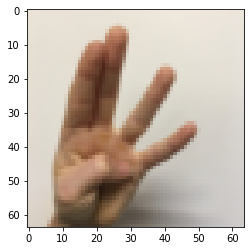

In [30]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [31]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(8,(4,4),strides=(1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D((8,8),strides=(8,8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(16,(2,2),strides=(1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D((4,4),strides=(4,4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(6,activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [32]:
conv_model = convolutional_model((64, 64, 3))
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_5 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_6 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [33]:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [34]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 31ms/step - loss: 1.7858 - accuracy: 0.1824 - val_loss: 1.7800 - val_accuracy: 0.2167
Epoch 2/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7743 - accuracy: 0.2491 - val_loss: 1.7732 - val_accuracy: 0.2583
Epoch 3/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7657 - accuracy: 0.3037 - val_loss: 1.7649 - val_accuracy: 0.3000
Epoch 4/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7558 - accuracy: 0.3741 - val_loss: 1.7558 - val_accuracy: 0.3750
Epoch 5/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7427 - accuracy: 0.3907 - val_loss: 1.7453 - val_accuracy: 0.4000
Epoch 6/100
17/17 [==============================] - 0s 24ms/step - loss: 1.7257 - accuracy: 0.4139 - val_loss: 1.7314 - val_accuracy: 0.3833
Epoch 7/100
17/17 [==============================] - 0s 23ms/step - loss: 1.7024 - accuracy: 0.4176 - val_loss: 1.7113 - val_accuracy: 0.4083
Epoch 

C:\Users\KK\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

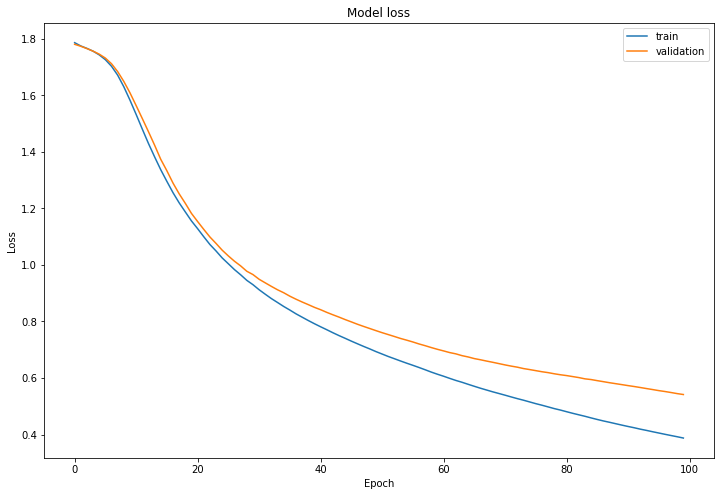

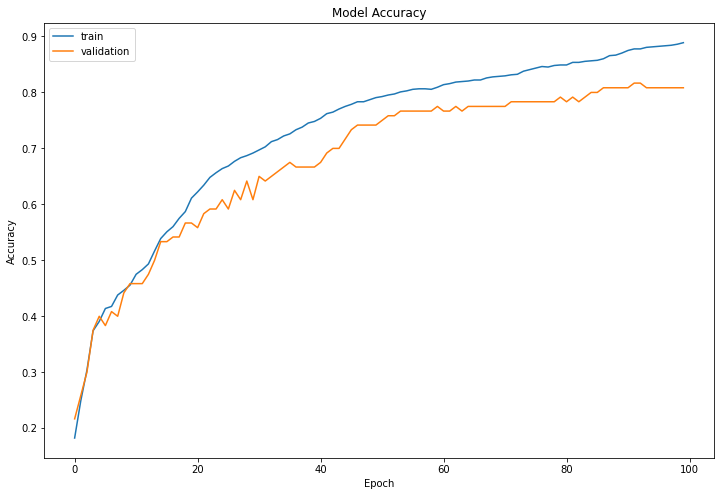

In [35]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [36]:
score = conv_model.evaluate(X_test, Y_test)

print(f"accuracy : {score[1]}, loss : {score[0]}")

4/4 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.8083
accuracy : 0.8083333373069763, loss : 0.5416737198829651
